# Forecasting Time Series using Prophet package 


#  linear or logistic regression  (g(t)) and Seasonality (s(t)) 

In [1]:
import pandas as pd                      #pandas for reading csv files
import numpy as np                       #numpy for numerical calculation 
from fbprophet import Prophet            #Prophet for forecasting data
import matplotlib.pyplot as plt          #matplotlib for plotting 

In [2]:
df = pd.read_csv('/home/aakash/Music/SP500.csv')     #reading a csv file
df['y'] = np.log(df['y'])                            #normalization of data 

In [ ]:
m = Prophet(growth='linear',weekly_seasonality=False )                         #additive regression model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5).fit(df)        #train the model
                                                    

In [4]:
future = m.make_future_dataframe(periods=30, freq='D')          # making future dataframes  for 30 days with day frequency 
fcst = m.predict(future)                                        # predicting the values

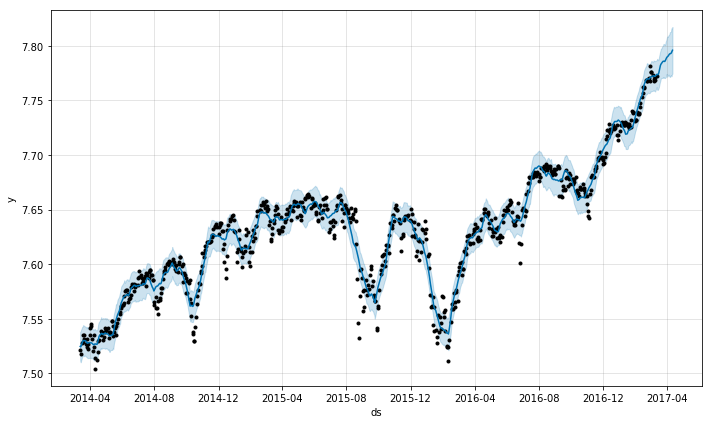

In [5]:
m.plot(fcst);                                       #plot the values

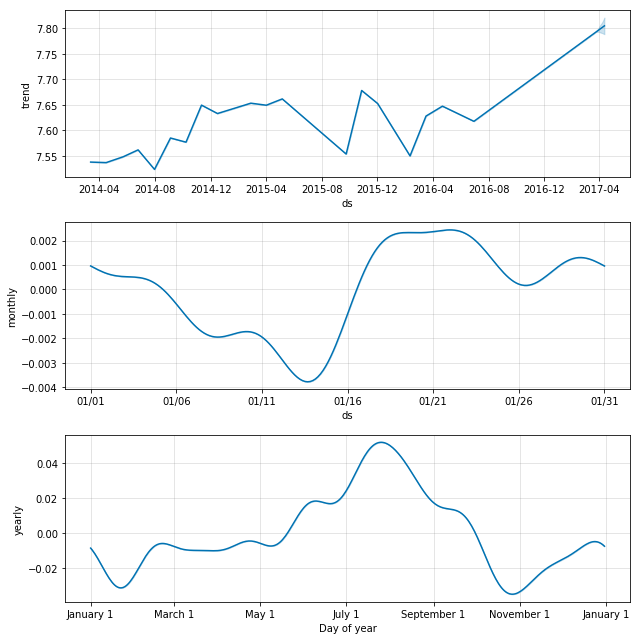

In [6]:
m.plot_components(fcst);                  #plot trend ,monthly and  yearly  prediction

# Holidays (h(t))

In [7]:
SickLeave = pd.DataFrame({                                  # Holidays which can change Accuracy
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
Vacation = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((SickLeave, Vacation))              

In [ ]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)          # train our data
forecast = m.predict(future)

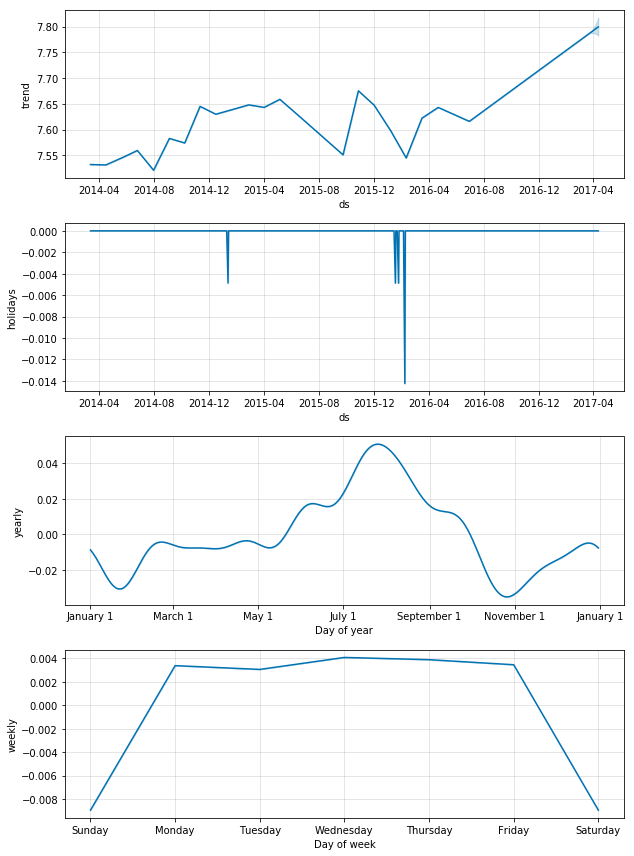

In [9]:
m.plot_components(forecast);                                          #plot the components trend ,holidays,yearly and weekly